In [1]:
#Import dependencies
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Read in data from CSV
test_df=pd.read_csv('Resources\DeptLabor.csv')
copy_df=test_df.copy()

In [3]:
#Printing dataframe
copy_df.head(20)

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,1.140000e+11,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,B,A,B,A,1.430425
1,1.370000e+11,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,B,A,B,B,B,A,1.712627
2,1.310000e+11,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,B,A,B,A,A,A,A,A,1.532551
3,1.930000e+11,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,B,A,A,A,B,A,C,2.302167
4,1.970000e+11,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,B,A,B,A,A,A,A,B,C,2.918573
5,1.560000e+11,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,...,B,B,B,A,A,A,B,B,A,1.675417
6,1.250000e+11,DL,4.0,2.0,4.0,3.0,4.0,2.0,3.0,2,...,NaN,NaN,NaN,NaN,A,NaN,NaN,B,NaN,1.294801
7,1.110000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2,...,B,B,B,B,B,A,B,A,C,1.266537
8,1.700000e+11,DL,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,B,A,C,A,B,A,1.825504
9,1.650000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,B,A,A,B,A,A,2.302167


In [4]:
#Drop rows with no outcome variable
test_df=test_df.loc[test_df['DLEAVING'].isin(['A', 'B', 'C', 'D'])]


In [5]:
test_df.head(20)

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,1.140000e+11,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,B,A,B,A,1.430425
1,1.370000e+11,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,B,A,B,B,B,A,1.712627
2,1.310000e+11,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,B,A,B,A,A,A,A,A,1.532551
3,1.930000e+11,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,B,A,A,A,B,A,C,2.302167
4,1.970000e+11,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,B,A,B,A,A,A,A,B,C,2.918573
5,1.560000e+11,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,...,B,B,B,A,A,A,B,B,A,1.675417
7,1.110000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2,...,B,B,B,B,B,A,B,A,C,1.266537
8,1.700000e+11,DL,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,B,A,C,A,B,A,1.825504
9,1.650000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,B,A,A,B,A,A,2.302167
10,1.920000e+11,DL,3.0,3.0,4.0,4.0,2.0,3.0,3.0,2,...,B,B,B,B,A,B,A,B,A,1.392428


In [6]:
missing_df = pd.DataFrame(test_df.isnull().mean()).reset_index()
missing_df.rename({'index': 'variable_name',0:'percent_missing'}, axis=1, inplace=True)
missing_df

,variable_name,percent_missing
0,RandomID,0.000000
1,agency,0.000000
2,Q1,0.005695
3,Q2,0.013240
4,Q3,0.014237
5,Q4,0.012386
6,Q5,0.006407
7,Q6,0.017938
8,Q7,0.009254
9,Q8,0.001708


In [7]:
test_df['row_percent_missing']=test_df.isnull().mean(axis=1)
test_df.head(20)

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT,row_percent_missing
0,1.140000e+11,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,A,B,A,1.430425,0.008621
1,1.370000e+11,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,A,B,B,B,A,1.712627,0.000000
2,1.310000e+11,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,A,B,A,A,A,A,A,1.532551,0.008621
3,1.930000e+11,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,A,A,A,B,A,C,2.302167,0.000000
4,1.970000e+11,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,A,B,A,A,A,A,B,C,2.918573,0.000000
5,1.560000e+11,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,...,B,B,A,A,A,B,B,A,1.675417,0.000000
7,1.110000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2,...,B,B,B,B,A,B,A,C,1.266537,0.000000
8,1.700000e+11,DL,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,A,C,A,B,A,1.825504,0.000000
9,1.650000e+11,DL,4.0,2.0,4.0,4.0,4.0,4.0,4.0,5,...,B,B,B,A,A,B,A,A,2.302167,0.000000
10,1.920000e+11,DL,3.0,3.0,4.0,4.0,2.0,3.0,3.0,2,...,B,B,B,A,B,A,B,A,1.392428,0.000000


In [8]:
#test_df['row_percent_missing'].hist()

In [9]:
# Drop rows with missingness above a certain threshold
cutpoint = .2

test_df=test_df.loc[test_df['row_percent_missing']<cutpoint]

In [10]:
test_df

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT,row_percent_missing
0,1.140000e+11,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,A,B,A,1.430425,0.008621
1,1.370000e+11,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,A,B,B,B,A,1.712627,0.000000
2,1.310000e+11,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,A,B,A,A,A,A,A,1.532551,0.008621
3,1.930000e+11,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,A,A,A,B,A,C,2.302167,0.000000
4,1.970000e+11,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,A,B,A,A,A,A,B,C,2.918573,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1.050000e+11,DL,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,...,B,B,A,A,A,A,B,A,1.659817,0.000000
7546,1.900000e+11,DL,4.0,4.0,3.0,4.0,4.0,2.0,3.0,2,...,B,B,A,A,A,B,B,D,1.464702,0.000000
7547,1.260000e+11,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,X,...,B,B,A,A,A,B,B,A,1.464702,0.000000
7548,1.650000e+11,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,...,B,B,A,A,A,B,B,A,1.435365,0.000000


In [11]:
# Recoding missing values
test_df = test_df.replace(r'X', np.nan, regex=True)
test_df = test_df.replace(r'Y', np.nan, regex=True)

In [12]:

df_columns = test_df.columns

for impute_column in df_columns:
    test_df[impute_column].fillna(test_df[impute_column].mode()[0], inplace=True)

In [13]:
df_columns

Index(['RandomID', 'agency', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       ...
       'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL',
       'DLEAVING', 'POSTWT', 'row_percent_missing'],
      dtype='object', length=117)

In [14]:
col_list = []
for i in range(1,100):
    column = "Q"+str(i)
    
    if column in test_df.columns:
        test_df[column] = test_df[column].astype(int)
        col_list.append(column)

<Axes: >

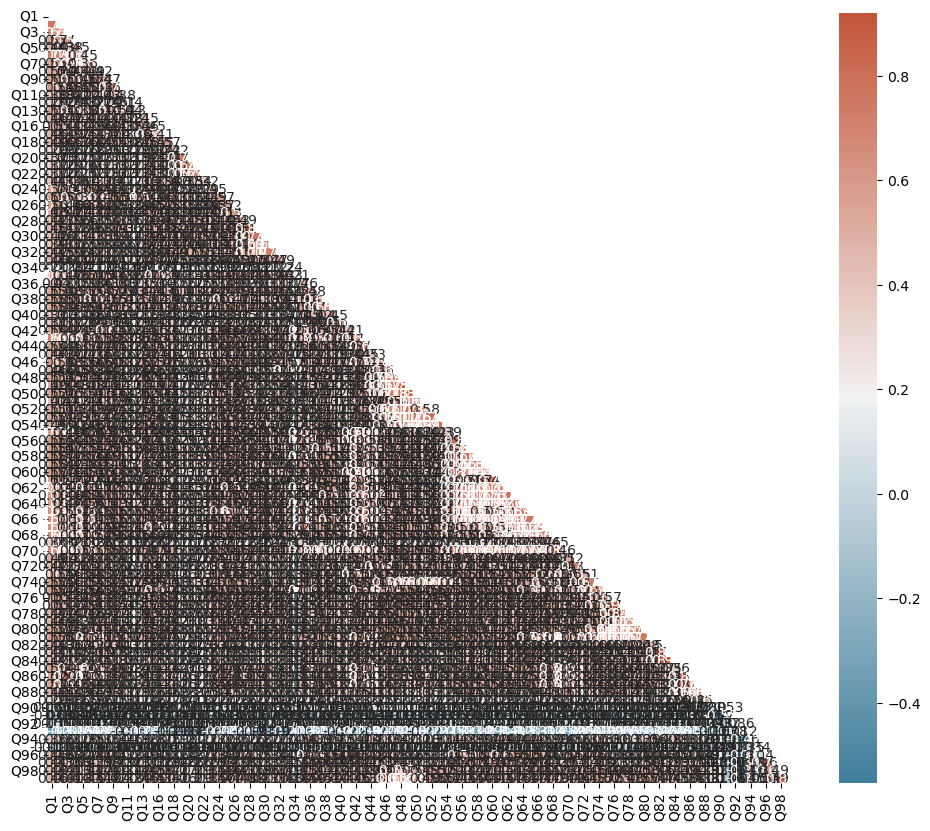

In [15]:
corr = test_df[col_list].corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [16]:
test_df['Q1'].dtypes

dtype('int32')

In [17]:
test_df['DRNO'].dtypes

dtype('O')

In [18]:
test_df['DLEAVING'] = np.where(test_df['DLEAVING']=='A',0,1)

In [19]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [20]:
test_df['Q84'] = np.where(test_df['Q84'].isin(['1', '2']),1,0)

In [21]:
test_df

,RandomID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,DRNO_C,DRNO_D,DHISP_B,DDIS_B,DAGEGRP_B,DSUPER_B,DFEDTEN_B,DFEDTEN_C,DSEX_B,DMIL_B
0,1.140000e+11,4,3,5,5,4,4,5,4,4,...,0,0,1,1,1,1,1,0,0,1
1,1.370000e+11,2,2,5,4,4,2,5,2,3,...,0,0,1,1,1,0,1,0,1,1
2,1.310000e+11,5,4,4,4,2,4,5,5,4,...,0,0,1,0,1,0,0,0,0,0
3,1.930000e+11,4,1,2,4,2,2,4,2,4,...,0,0,1,1,0,0,0,0,1,0
4,1.970000e+11,3,4,3,4,3,3,3,3,4,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1.050000e+11,5,5,5,5,5,5,5,5,5,...,0,0,1,1,0,0,0,0,0,1
7546,1.900000e+11,4,4,3,4,4,2,3,2,3,...,1,0,1,1,0,0,0,0,1,1
7547,1.260000e+11,4,4,4,4,4,4,4,5,4,...,1,0,1,1,0,0,0,0,1,1
7548,1.650000e+11,4,4,4,4,4,4,4,4,4,...,0,0,1,1,0,0,0,0,1,1


In [22]:
mean = test_df[['Q10', 'Q14', 'Q16']].mean(axis=1).mean()    
print(mean)

3.8142504509636384


In [23]:
test_df['DLEAVING']

0       0
1       0
2       0
3       1
4       1
       ..
7545    0
7546    1
7547    0
7548    0
7549    1
Name: DLEAVING, Length: 7022, dtype: int32

In [24]:
y = test_df['DLEAVING']
X = test_df.drop(['DLEAVING'],axis=1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [27]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [28]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6798328902392708
Testing Data Score: 0.6816628701594533


In [29]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
4203,0,1
2642,0,0
3083,0,0
4045,0,0
4029,0,0
...,...,...
3047,0,0
4740,0,0
4263,0,0
914,0,0


In [30]:
accuracy_score(y_test, predictions)

0.6816628701594533